<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

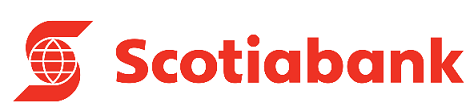**Twitter Sentiment Analysis**

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install nltk
!pip install unidecode
!pip install textaugment
!pip install joypy
!pip install wordcloud
!pip install better_profanity
!pip install lime
!pip install pyLDAvis==2.1.2
!pip install gensim
# To load the spacy pre trained model use the following code
#!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 4.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
# Import Libraries
import sys
import tweepy
import pandas as pd
import numpy as np
import os
import spacy
import joypy
import unidecode
import unicodedata
import seaborn as sns
from PIL import Image
import matplotlib
%matplotlib inline

# NLP Libraries
#nltk.download('brown')
import itertools
from time import time
import nltk, re, string, collections
from matplotlib import pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
from nltk.corpus import brown
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perception_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import *
from better_profanity import profanity
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

# sklearn Libraries
from pyLDAvis import gensim
import pyLDAvis.gensim
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
# LIME
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_tabular import LimeTabularExplainer
#import lime.lime_tabular

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional 

## Gathering Data from Twitter using API

### Authentication Keys (Individual Account)

API account
https://developer.twitter.com/en/portal/dashboard

In [4]:
# Authentication
consumerKey = "Gqxmwe06eIqw0NBmCi0L1rmbh"
consumerSecret = "cborR6m0P5LnLB1U2WV4Wz4zI4Wazs9BE1v31x2bcMeeSkm0pf"
accessToken = "1378575615981457409-Aotg3k1WfJu8l8kM8sbs2utHbTFeaO"
accessTokenSecret = "RmH71WeV1XyF66veJJh78vILJ5lt5MqaNNPpbQqZ8E2jm"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

### Gathering Tweets- Tweet cap 
500,000 Tweets / month
PER PROJECT

In [5]:
# User Search and No of Tweets to capture
tweet_lst=[]
users = ['@globeinvestor','@bloombergCA','@Marketcall','@LA&C Investments','@TheMotleyFoolCA','@BNNBloomberg','@YahooFinanceCA','@StockTrades_CA','@rcarrick','@marketsglobe','@PattieCTV','@Streetwise','@stockchase',
'@financialpost','@FinMKTG','@JonChevreau','@MoneySense','@BoomerandEcho','@squawkfox','@reformedbroker','@thestalwart' ,'@michaelbabad','@FTalphaville','@dbcurren',
'@benrabidoux','@noahpinion','@boes_','@sbarlow_ROB','@amberkanwar','@business','@elerianm','@reutersjamie','@M_C_Klein',
'@economistmeg','@tylercowen','@nictrades','@ReformedBroker','@TheStalwart','@VitalikButerin','@ritholtz','@LizAnnSonders',
'@IvanTheK','@charliebilello','@satoshilite',
'@ritholtz','@awealthofcs','@RaoulGMI','@MarkYusko','@allstarcharts','@5_min_macro','@longshorttrader','@ScottMinerd','@Callum_Thomas','@RyanDetrick','@TheBubbleBubble','@KeithMcCullough',
'@Ukarlewitz','@cullenroche','@DougKass']

# Failed to retrieve
#'@LA&C Investments','@katie_martin_FX','@mikepmoffat'


# For loop to run the list of usernames and then for loop to extract Full Text from the tweets
for user in users:
    tweets = api.user_timeline(screen_name = user, count = 100, lang = "en", tweet_mode = "extended")
    for tweet in tweets:
      tweet_lst.append(tweet.full_text)
    #print(f"- {tweet.full_text}")
print(len(tweet_lst))

58


In [6]:
# Keyword Search and No of Tweets to capture
search_keyword = ['scotiabank','BNS','Canadian Banking','Canadian Banks','Earnings release','EPS','Profits','Reserves','Provisions',
                  'Credit cards','Personal loans','Loan growth','Loan origination','Credit quality','Delinquency','Past due loans',
                  'Impaired loans','Allowances','Reserves','Loan loss','Credit loss','Vintage','Write offs','Collections','Strategy',
                  'Big5','PCL', 'Risk','Retail lending','Secured loans','Unsecured loans','Mortgages','Home equity loans','Auto loans',
                  'Line of credit']
# For loop to run the list of keywords and then for loop to extract Full Text from the tweets
tor = ("43.653225,-79.383186,1000km") #“latitide,longitude,radius”
ny = ("40.712776,-74.005974,1000km")
cal = ("51.048615,-114.070847,1000km")
sfc = ("37.774929,-122.419418,1000km")
lnd = ("51.507351,-0.127758,500km")
coordinate = [tor,ny,cal,sfc,lnd]

for keywd in search_keyword:
  for geo in coordinate:
    tweets = api.search(q = keywd, lang = "en",tweet_mode = "extended",count = 100, geocode = geo, ) # add other cities as well.
    for tweet in tweets:
      tweet_lst.append(tweet.full_text)
#tweet_lst[:5]
print(len(tweet_lst))

221


In [7]:
# Print and analyze the tweets in raw text
#tweet_lst[0:-1]

In [8]:
# Create a copy of the list to work on
tw_copy = tweet_lst.copy()

### Using Pipeline to clean text

Make text lowercase
Remove punctuation
Remove emoji’s
Remove stopwords
Lemmatization

In [9]:
# Cleaning pipeline (RT, Punctuation etc)

stop_words = set(stopwords.words('english')+['http','rt','https'])

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()
    # The profanity.censor method is used to mask inappropriate words with special characters. The default setting uses “*”
    x = profanity.censor(x)
    #Removing RT
    x = re.sub('RT @\\w+: '," ",x)
    # Remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ',x)
    # Remove punctuation
    x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\\w+:\\S+)"," ",x)
    # Lower case
    x = x.lower()
    # Remove non-unicode
    x = unidecode.unidecode(x)
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [10]:
# Test preprocessing pipeline
preprocess('RT @KiwiPMI: http:// @ #$#% what the duck is wrong with the market')

'duck wrong market'

In [11]:
# Declare a list that contains the search word
#search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_copy:
  if "playoff" not in x:
    list1.append(x)
  elif "arena" not in x:
    list1.append(x)
  elif "game" not in x:
    list1.append(x)
  elif "hockey" not in x:
    list1.append(x)
  elif "NHL" not in x:
    list1.append(x)
  elif "StanleyCup" not in x:
    list1.append(x)
  elif "soccer" not in x:
    list1.append(x)
  elif "football" not in x:
    list1.append(x)

In [12]:
tweet_list = pd.DataFrame(list1)  # Converting the list to Pandas DataFrame
tweet_list.columns=['tweets'] # Renaming the column 0 to tweets
tweet_list.head() # Display first 5 rows

tweets
0  Why Citi just downgraded U.S. equities. Plus, ...
1  U.S. Stocks Fall on Clarida Comments, Jobs Mis...
2  RT @KiwiPMI: I will be appearing on @marketcal...
3  This is an excellent thread. https://t.co/X6u2...
4  Royal Caribbean Cruises Ltd. shares retreated ...

In [13]:
# Import the file to local machine
from google.colab import files
tweet_list.to_csv('tweet_list.csv')

In [14]:
# Apply Preprocessing pipeline to Tweets Dataframe
tweet_list['tweets'] = tweet_list['tweets'].apply(preprocess)
# Check for duplicates and drop them.
tweet_list['tweets'].drop_duplicates(inplace = True)

## Sentiment Analysis using TextBlob

In [15]:
#Calculating Negative, Positive, Neutral and Compound values
# TextBlod finds all the words and phrases that it can assign polarity and subjectivity to, and average all of them together. 
  #Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity. A corpus’ sentiment is the average of these.
  #Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
  #Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

tweet_list[['polarity', 'subjectivity']] = tweet_list['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list.head(10)

tweets  polarity  ...    pos compound
0  citi downgraded u equity plus radar stock big ...     0.000  ...  0.178   0.3818
1  u stock fall clarida comment job miss market wrap     0.000  ...  0.000  -0.1531
2  appearing monday noon answering call global eq...     0.000  ...  0.000   0.0000
3                                   excellent thread     1.000  ...  0.787   0.5719
4  royal caribbean cruise ltd share retreated com...    -0.050  ...  0.124  -0.3182
5  metro vancouver housing market continues slow ...     0.072  ...  0.000  -0.3400
6  dialogue health hit market plenty momentum com...     0.160  ...  0.000   0.0000
7                                              would     0.000  ...  0.000   0.0000
8  world share ride earnings fresh high u dollar ...     0.145  ...  0.371   0.5994
9                                         hysterical    -1.000  ...  0.000  -0.0258

[10 rows x 8 columns]

In [16]:
# Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tw_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tw_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [17]:
tw_list_negative.head()

tweets  ...  compound
1   u stock fall clarida comment job miss market wrap  ...   -0.1531
4   royal caribbean cruise ltd share retreated com...  ...   -0.3182
5   metro vancouver housing market continues slow ...  ...   -0.3400
9                                          hysterical  ...   -0.0258
11  yesterday stockpicks panic proof portfolio sto...  ...   -0.5106

[5 rows x 8 columns]

In [18]:
# Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [19]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

Total  Percentage
positive    130       58.82
negative     47       21.27
neutral      44       19.91

# EDA (Exploratory Data Analysis)

### Hastag Frequency

In [20]:
# Function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

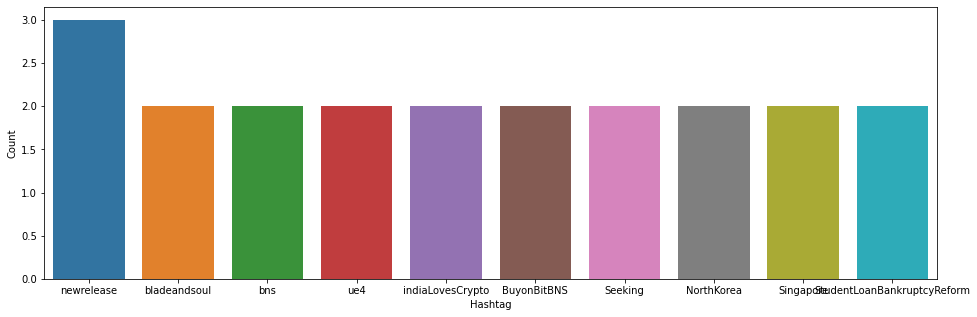

In [21]:
HT = hashtag_extract(tw_copy) # Using the original list which is uncleaned to extract hashtags
# unnesting list
HT = sum(HT,[])
a = nltk.FreqDist(HT)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [22]:
# Tokenize the Tweets
def tokenize_tweets(myString):
    tokens = word_tokenize(myString)
    #stemmer = PorterStemmer()
    #result = ([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english')]
    result = [token.lower() for token in tokens if token.lower() not in stop_words]
    return result

tok_tweet_list = tweet_list['tweets'].apply(tokenize_tweets)
print(tok_tweet_list)

0      [citi, downgraded, u, equity, plus, radar, sto...
1      [u, stock, fall, clarida, comment, job, miss, ...
2      [appearing, monday, noon, answering, call, glo...
3                                    [excellent, thread]
4      [royal, caribbean, cruise, ltd, share, retreat...
                             ...                        
216    [challenger, bank, hmbradley, hunting, new, pa...
217    [looking, freshen, thing, refresh, space, home...
218    [looking, freshen, thing, refresh, space, home...
219    [mike, rider, athletic, u, plus, work, trainin...
220    [got, different, factor, credit, scoring, numb...
Name: tweets, Length: 221, dtype: object


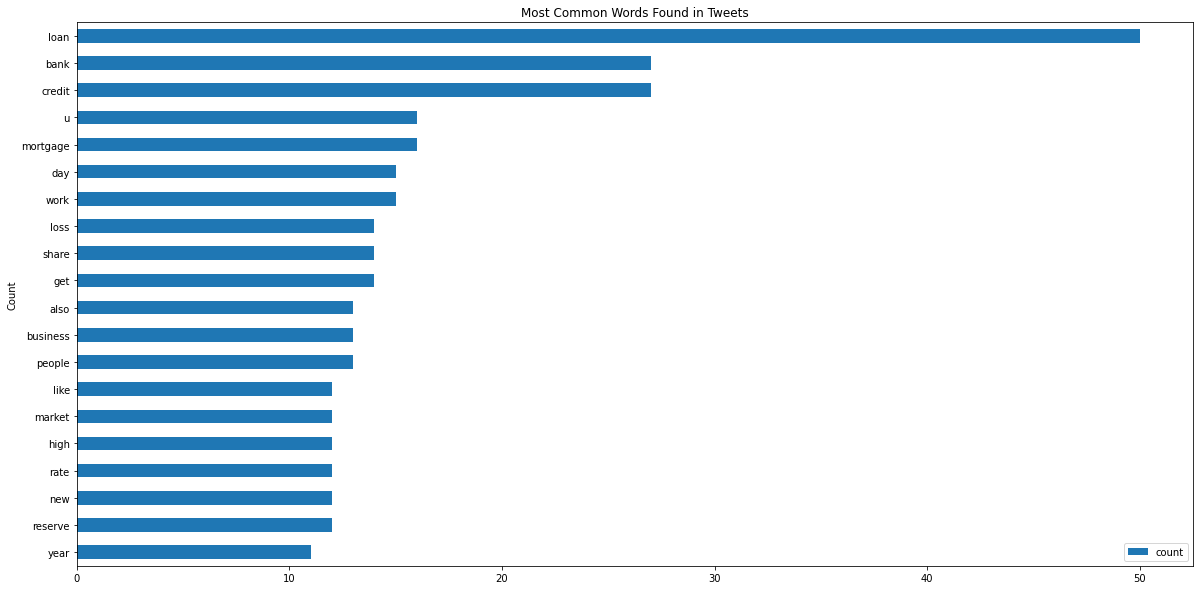

In [23]:
# Returns most common terms, aside from stop words #

# List of all words across tweets
def most_common(terms_all):
  words_in_tweet = [tweet for tweet in terms_all]
  interesting_terms = list(itertools.chain(*words_in_tweet))
  # Create counter
  counts = collections.Counter(interesting_terms)
  return counts.most_common(20)

# Plot horizontal bar graph

most_comm = pd.DataFrame(most_common(tok_tweet_list),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(20, 10))
most_comm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax)
ax.set_title("Most Common Words Found in Tweets")
ax.set(ylabel = 'Count')
plt.show()

### Wordcloud

In [24]:
#Function to Create Bigram using the tokenized word list above, and convert it to a tupple
tokens = []
def get_bigram(myString):
  for text in myString:
    bigram_finder = BigramCollocationFinder.from_words(text)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 100)
    for bigram_tuple in bigrams:
      x = "%s_%s" % bigram_tuple
      tokens.append(x)

    result = [' '.join([w.lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 8]
    return result
#get_bigram(tok_tweet_list)

In [25]:
#Function to Create Wordcloud
def create_wordcloud(text):
  # Creating a custom list of stopwords
  #customStopwords=list(STOPWORDS) + ['country']
  stopwords = set(STOPWORDS)
  wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=stopwords,
                            background_color='white',
                            width=400,
                            height=320
                          ).generate(str(text))

  plt.figure(figsize=(20,8))
  plt.imshow(wordcloudimage)
  plt.axis("off")
  plt.show()

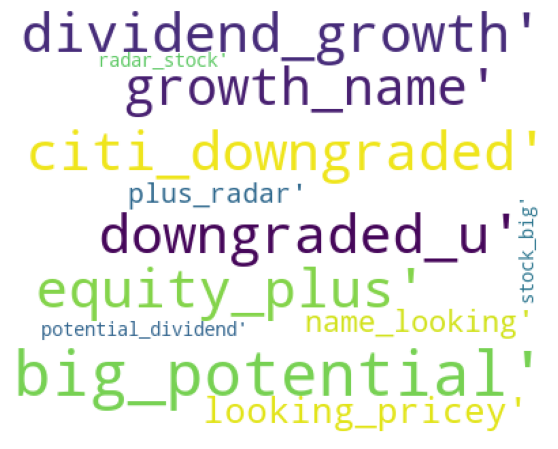

In [26]:
#create_wordcloud(NewNounString)
create_wordcloud(get_bigram(tok_tweet_list))

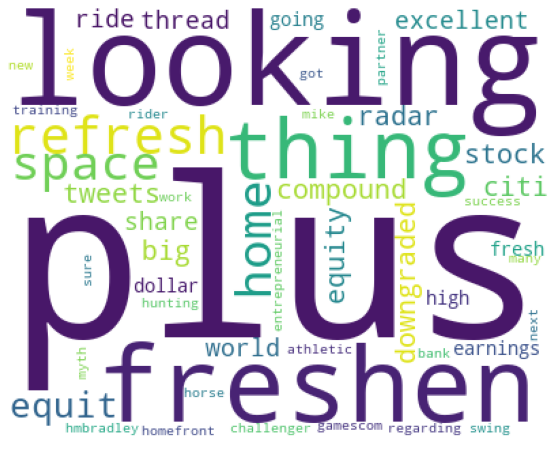

(None,)

In [27]:
create_wordcloud(tw_list_positive),

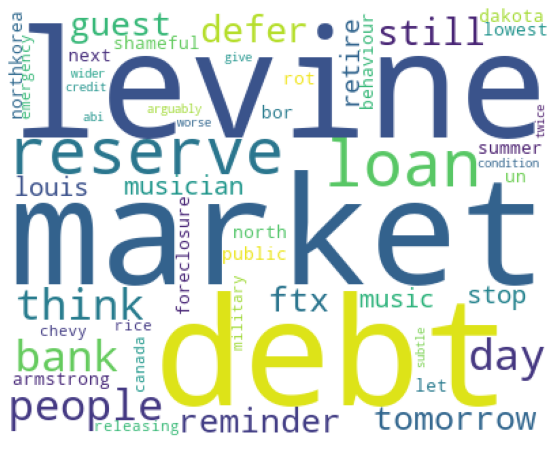

In [28]:
create_wordcloud(tw_list_negative)

### Joyplot

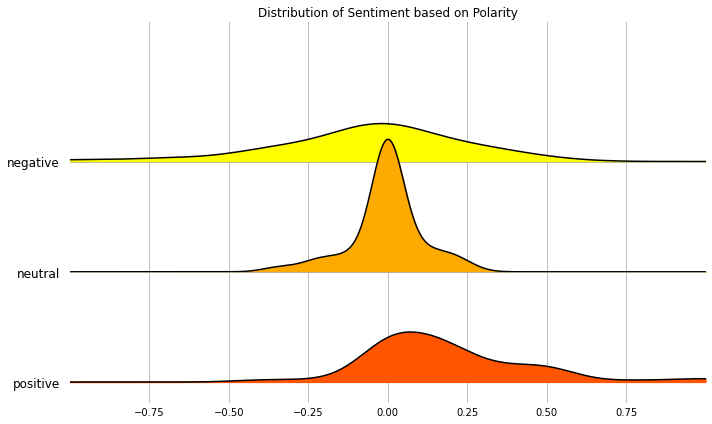

In [29]:
# Joy Plot
sm = matplotlib.cm.ScalarMappable(cmap=cm.autumn_r)
ar = tweet_list.value_counts()
fig, axes = joypy.joyplot(tweet_list ,grid=True,by=['sentiment'],column=['polarity'],ylabelsize=12,title="Distribution of Sentiment based on Polarity",figsize=(10,6),colormap=cm.autumn_r,x_range=[-1,0,1])

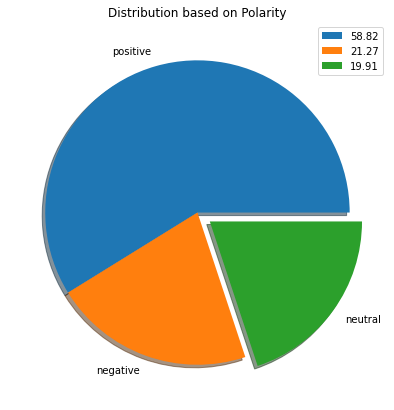

In [30]:
#Creating PieCart
pichart = count_values_in_column(tweet_list,"sentiment")
index = pichart.index
percent = pichart["Percentage"]
explode = (0, 0 ,0.1)  # explode 1st slice
fig = plt.figure(figsize =(10, 7))
plt.title("Distribution based on Polarity")
plt.pie(percent, explode = explode, labels = index, shadow = True)
plt.legend(percent)
plt.show()


Topic Modeling

In [31]:
tokens = tweet_list['tweets'].apply(tokenize_tweets)
tweet_list['tokens'] = tokens
tweet_list['index'] = tweet_list.index
#tweet_list

In [32]:
# Make tokens a string again
#Natural Language Processing (NLP)
import warnings
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')

nlp = spacy.load('en_core_web_sm')

tweet_list['tokens_back_to_text'] = [' '.join(map(str, l)) for l in tweet_list['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

tweet_list['lemmas'] = tweet_list['tokens_back_to_text'].apply(get_lemmas)


In [33]:
# Create a id2word dictionary
id2word = Dictionary(tweet_list['tokens'])
print("id2word = " , len(id2word))
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print("id2word filtering extremes = " , len(id2word))
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in tweet_list['tokens']]
print("corpus length = " , len(corpus))

id2word =  1582
id2word filtering extremes =  647
corpus length =  221


In [34]:
# Instantiating a Base LDA model 
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)

In [35]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [36]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [37]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
bank loan put new get credit profit market one need

------ Topic 1 ------
bank mortgage loan rate risk high could credit like hand

------ Topic 2 ------
credit loan write fresh health pay people canada family think

------ Topic 3 ------
loan mortgage home day debt equity place spy good canada

------ Topic 4 ------
loan share system loss day earnings business end still bank



In [38]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=tweet_list['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -6.665911700082479

Coherence Score:  0.5206151038299625


In [40]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.180382  0.038800       1        1  25.033316
1      0.072561  0.014330       2        1  20.820394
2      0.056959  0.034072       3        1  19.923644
0      0.052262  0.072606       4        1  17.301226
3     -0.001400 -0.159808       5        1  16.921420, topic_info=           Term       Freq      Total Category  logprob  loglift
22        share  12.000000  12.000000  Default  30.0000  30.0000
193      system   8.000000   8.000000  Default  29.0000  29.0000
43        fresh   6.000000   6.000000  Default  28.0000  28.0000
59       canada   7.000000   7.000000  Default  27.0000  27.0000
566       write   7.000000   7.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
25         high   1.670742  10.032652   Topic5  -5.4443  -0.0160
60   investment   1.664231   7.837085   Topic5  -5.4482   0.2271
161        fair   1.661965   3.835810   Topic5  -5.4495   0.9402
29        price   1.661932   5.468736   Topic5  -5.4496   0.5855
12       market   1.661531   9.979826   Topic5  -5.4498  -0.0162

[307 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
337       3  0.950393    accept
110       2  0.513712  activity
110       3  0.256856  activity
107       3  0.950389   advance
606       2  0.860043     alice
...     ...       ...       ...
102       1  0.424840      year
102       2  0.318630      year
102       4  0.212420      year
126       1  0.938266       yet
495       3  0.846186     young

[424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

#Modeling

In [45]:
# Split the data into Train, Test and Validate
X = tweet_list['tweets']
y = tweet_list['sentiment']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.30, random_state=42)
print(X_train.count(), X_test.count(), X_val.count())

154 46 21


In [46]:
ngrams = (1,1)
tfidf = TfidfVectorizer(ngram_range=ngrams, stop_words='english', analyzer='word', use_idf=True, norm='l2') #TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 
X_train_text = tfidf.fit_transform(X_train)
X_test_text = tfidf.transform(X_test)

In [47]:
#on TF-IDF data
MNB = MultinomialNB()
MNB.fit(X_train_text, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(X_test_text), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

BNB = BernoulliNB()
BNB.fit(X_train_text, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test_text), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

CNB = ComplementNB()
CNB.fit(X_train_text, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(X_test_text), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

GNB = GaussianNB()
GNB.fit(X_train_text.todense(), y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(X_test_text.todense()), y_test)
print('accuracy_score_gnb = '+str('{:4.2f}'.format(accuracy_score_gnb*100))+'%')

LSVC = LinearSVC(random_state=0, tol=1e-5)
LSVC.fit(X_train_text, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(X_test_text), y_test)
print('accuracy_score_lsvc = '+str('{:4.2f}'.format(accuracy_score_lsvc*100))+'%')

SGDC = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=70, shuffle=True, verbose=0, n_jobs=None)
SGDC.fit(X_train_text, y_train)
accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(X_test_text), y_test)
print('accuracy_score_sgdc = '+str('{:4.2f}'.format(accuracy_score_sgdc*100))+'%')

accuracy_score_mnb = 73.91%
accuracy_score_bnb = 67.39%
accuracy_score_cnb = 69.57%
accuracy_score_gnb = 73.91%
accuracy_score_lsvc = 73.91%
accuracy_score_sgdc = 80.43%


Improving SGD Classifier Model

In [48]:
# Creating Pipeline
# Using CountVectorizer and TFIDF then combining them in SGD Classifier
pipeline = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier()),])

parameters={'vect__max_df':(0.5,0.75,1.0),'vect__ngram_range':((1,1),(1,2)),'tfidf__use_idf':(True,False),
            'tfidf__norm':('l1','l2'),'clf__max_iter':(22,),'clf__alpha':(0.00001,0.000001),'clf__penalty':('l2','elasticnet'),
            'clf__max_iter':(10,30,70),}

In [49]:
if __name__== "__main__":
  grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
  print("pipeline:",[name for name,_ in pipeline.steps])
  print("parameters:")
  print(parameters)
  t0 = time()
  grid_search.fit(X_train,y_train)
  print()
  print("Best score:%0.3f" % grid_search.best_score_)
  print("Best parameters:")
  best_parameters = grid_search.best_estimator_.get_params()
  for  param_name in sorted ( parameters.keys()):
    print("\t%s:%r"%(param_name,best_parameters[param_name]))

pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.75, 1.0), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__max_iter': (10, 30, 70), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.6s



Best score:0.675
Best parameters:
	clf__alpha:1e-06
	clf__max_iter:30
	clf__penalty:'elasticnet'
	tfidf__norm:'l2'
	tfidf__use_idf:False
	vect__max_df:1.0
	vect__ngram_range:(1, 1)


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   16.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:818: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [50]:
# Creating Model using pipeline using best parameters
model = Pipeline([('vect',CountVectorizer(max_df=1.0,ngram_range=(1,1))),
                          ('tfidf',TfidfTransformer(norm='l2',use_idf=True)),
                          ('clf',SGDClassifier(alpha=1e-05,loss='log',penalty='l2',max_iter=70))])
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log', max_iter=70,
           

In [51]:
y_val_pred = model.predict(X_test)
print(confusion_matrix(y_true=y_test,y_pred=y_val_pred))
class_names=[str(x)for x in model.classes_]
print(classification_report(y_true=y_test,y_pred=y_val_pred,target_names=class_names))

[[ 4  1  7]
 [ 0  2  3]
 [ 1  1 27]]
              precision    recall  f1-score   support

    negative       0.80      0.33      0.47        12
     neutral       0.50      0.40      0.44         5
    positive       0.73      0.93      0.82        29

    accuracy                           0.72        46
   macro avg       0.68      0.55      0.58        46
weighted avg       0.72      0.72      0.69        46




Explaining predictions using lime


In [133]:
# Taking a sample of the data to verify in LIME and predicting its probability
def use_lime(text):
  print(text) 
  print(class_names)
  print(model.predict_proba([text]).round(2))
  print(model.predict([text]))
  
  # Using LIME
  explainer = LimeTextExplainer(class_names=class_names)
  exp = explainer.explain_instance(text, model.predict_proba, num_features=153, labels=[0,1,2])
  exp.show_in_notebook(text=text)

In [136]:
data_pred = X_val.iloc[5]
use_lime(data_pred)

well kenney need patient privatization push causing myriad long term effect child way ensure profit corporate profit health care partner
['negative', 'neutral', 'positive']
[[0.22 0.   0.78]]
['positive']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


Search for tweet from original list based on the search string

In [61]:
# Search for tweet from original list based on the search string
find_tweet = 'solution architect'
filter_object = filter(lambda a: find_tweet in a, tweet_lst) # The filter() applies the lambda to the iterable and only returns all matches where the lambda evaluates True

# Convert the filter object to list
print(*list(filter_object), sep='\n')

Monitor's 2021 NextGen
Peter Van Dyke is a solution architect at Northteq. He works directly with clients to implement lease and loan origination systems, refine business processes, develop enhancements and resolve issues. He also is... Read more: https://t.co/Iqpb3LZW5k https://t.co/LSrV7AAs5v
Monitor's 2021 NextGen
Peter Van Dyke is a solution architect at Northteq. He works directly with clients to implement lease and loan origination systems, refine business processes, develop enhancements and resolve issues. He also is... Read more: https://t.co/Iqpb3LZW5k https://t.co/LSrV7AAs5v


Try the model using your own tweet

In [140]:
def mod_test(new_tweet):
  process = preprocess(new_tweet)
  pred = model.predict([process])
  print(pred)
  use_lime(process)

In [145]:
mod_test('This is absolutely absurd, that it is not working as its supposed to be!!!')

['negative']
absolutely absurd working supposed
['negative', 'neutral', 'positive']
[[0.42 0.21 0.37]]
['negative']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


.

.

References:
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

https://towardsdatascience.com/detecting-hate-tweets-twitter-sentiment-analysis-780d8a82d4f6

https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb
https://towardsdatascience.com/twitter-topic-modeling-e0e3315b12e2